<a href="https://colab.research.google.com/github/Rhaqim/UK-retail-Store-Analysis/blob/main/Uk_online_retail_txn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis on Online Retail Transactions for United Kingdom Store**
This note book seeks to gain clear insight into a retail's store transactions for the years 2010 and 2011.

## **Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Reading the file using Pandas**
This is a Colab and the file is located in a Google Drive. To get it to Colab, the file is uploaded and loaded from it's local memory. To re-run all the cells kindly upload the file with it's original file name '_UK_online.retail.xlsx' to preserve the integrity of the notebook.

In [ ]:
from google.colab import files #uploading the excel file into Google Colab 
uploaded = files.upload()

Saving _UK_online.retail.xlsx to _UK_online.retail (7).xlsx


In [ ]:
df = pd.read_excel('_UK_online.retail.xlsx')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## **Exploring the data**
The following cells provide more information about the dataset, the types of values in each column, if there are missing values e.t.c

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    3197 non-null   object        
 1   StockCode    3197 non-null   object        
 2   Description  3197 non-null   object        
 3   Quantity     3197 non-null   int64         
 4   InvoiceDate  3197 non-null   datetime64[ns]
 5   UnitPrice    3197 non-null   float64       
 6   CustomerID   3143 non-null   float64       
 7   Country      3197 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 199.9+ KB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,3197.000000,3197.000000,3143.000000
mean,20.144510,3.377488,14295.406936
std,55.367125,6.132378,1733.394606
min,-31.000000,0.000000,12347.000000
25%,3.000000,1.250000,12597.000000
50%,8.000000,1.950000,14418.000000
75%,12.000000,3.750000,15311.000000
max,1488.000000,165.000000,18269.000000


In [ ]:
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     54
Country         0
dtype: int64

In [ ]:
df = df[df['Quantity'] > 0] #removing all negative values

**The above cells show some results that would be explored later in this notebook.**

**1. There appears to be missing values**

**2. The Quantity Column has negative values, which are dropped**

## **Exploring thr Countries Column to answer some questions**

In [ ]:
df['Country'].nunique() # number of Unique values in the column

23

In [ ]:
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df.Country)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CODE
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,GBR
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,GBR
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,GBR
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,GBR
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,GBR


In [ ]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df,on='CODE')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CODE
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,GBR
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,GBR
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,GBR
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,GBR
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,GBR


In [ ]:
fig = px.scatter_geo(df, locations="CODE", title='Map Showing Location of all Countries sold to'
                     )
fig.show()

In [ ]:
df['Country'].value_counts() # number of times a country shows up in the column

United Kingdom     1515
France              284
EIRE                194
Spain               171
Netherlands         158
Germany             143
Portugal            103
Cyprus              100
Norway               89
Iceland              78
Belgium              66
Poland               45
Italy                36
Lithuania            33
Japan                31
Greece               22
Australia            21
Denmark              20
Channel Islands      17
Sweden               16
Austria              11
Switzerland           6
Czech Republic        2
Name: Country, dtype: int64

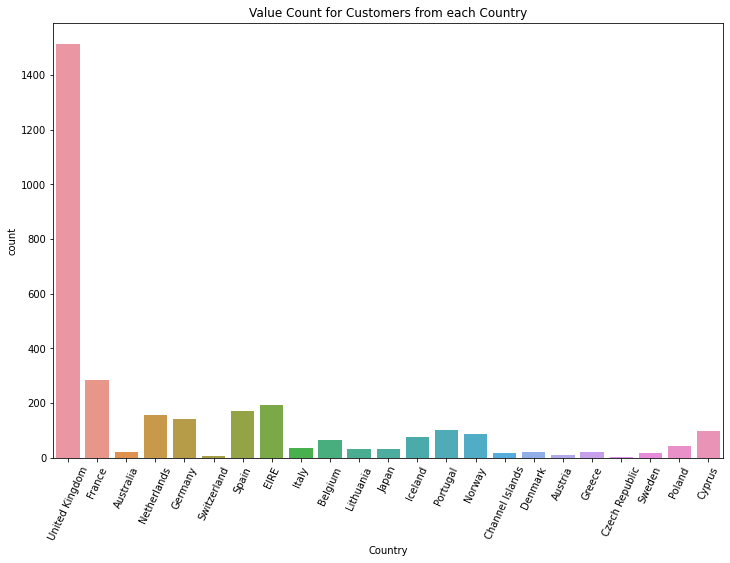

In [ ]:
plt.figure(figsize=(12,8)) # plot to show value count
sns.countplot(x='Country', data=df)
plt.xticks(rotation=65)
plt.title('Value Count for Customers from each Country')
plt.show()

In [ ]:
fig = px.pie(df, names='Country', title='Percentage of Customers from each country') #pie chat to show percentage
fig.update_layout(
    margin=dict(l=0, r=0, t=40, b=0)
)
fig.show()

**The above cells provide the following information:**

**1. There are 23 Countries the United Kingdom Retial Store Sells to most of which are in Europe**

**2. Each Country has more than one customer, Czech Republic having the smallest amount with 2 customers.**

## **Number of Customers in the United Kingdom**

In [ ]:
UK_df = df[df['Country'] == 'United Kingdom'] #filtering to get only data from the United Kingdom
UK_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CODE
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,GBR
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,GBR
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,GBR
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,GBR
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,GBR
...,...,...,...,...,...,...,...,...,...
3177,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,GBR
3178,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,GBR
3179,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,GBR
3180,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,GBR


In [ ]:
UK_df.isna().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     53
Country         0
CODE            0
dtype: int64

In [ ]:
UK_df['CustomerID'].count() #missing values are in the customer id section, since the data is small compared to the rest and cannot be filled randomly it should be ignored

1462

**The number of customers in the United Kingdom are *1462*, there are 53 missing values in the customerID column, since the number is significantly less compared to the overall number, it can be ignored.** 

## **Showing UnitPrice distribution for the United Kingdom using a Histogram**

In [ ]:
fig = px.histogram(UK_df, x="UnitPrice", title='Histogram Graph Showing UnitPrice Distribution for the United Kingdom')
fig.show()

In [ ]:
UK_df['UnitPrice'].mean()

3.1569108910890984

In [ ]:
UK_df['UnitPrice'].mode()

0    1.25
dtype: float64

**The above cells give the measure of central tendency for the United Kingdom sales**

**1. The UnitPrice distribution is between 0.5 and 165.49, with most concentrated between 0.5 - 1.49**

**2. The mean is 3.189 to 3 decimal places**

**3. The mode is 1.25**

## **Annual Revenue for United Kingdom Retail Store**

In [ ]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year # get just the year from the InvoiceDate Column and make it its own column

In [ ]:
df['TotalPrice'] = df['Quantity'].multiply(df['UnitPrice']) # multiply the Quantity by the unit price to get the total price for each item purchased at that time

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,TotalPrice
count,3161.000000,3161.000000,3108.000000,3161.000000,3161.000000
mean,20.450174,3.363841,14279.655727,2010.565011,34.711240
std,55.598961,6.144077,1728.617599,0.495834,95.987809
min,1.000000,0.000000,12347.000000,2010.000000,0.000000
25%,3.000000,1.060000,12597.000000,2010.000000,9.360000
50%,8.000000,1.950000,14307.000000,2011.000000,15.300000
75%,12.000000,3.750000,15311.000000,2011.000000,25.400000
max,1488.000000,165.000000,18269.000000,2011.000000,3794.400000


In [ ]:
df['Year'].unique() # get the years

array([2010, 2011])

In [ ]:
year_2010 = df[df['Year'] == 2010] # add the total price to get the sum for 2010
year_2010['TotalPrice'].sum() 

40579.42

In [ ]:
year_2011 = df[df['Year'] == 2011] # add the total price to get the sum for 2011
year_2011['TotalPrice'].sum()

69142.81

**After gettting the year for each purchase, the quantity is multiplied by the unit price to get the total amount of that purchase and them summed together for each year:**

**1. The year 2010 has a total revenue of 40579.42**

**2. The year 2011 has a total revenue of 69142.81**

## **Most Profitable customer**

In [ ]:
df.groupby(by='CustomerID')['TotalPrice'].sum().nlargest() #grouping the total price by each customer ID and finding the largest figure

CustomerID
14646.0    24676.86
17511.0     6399.86
14737.0     4512.26
14911.0     4265.64
12755.0     3794.40
Name: TotalPrice, dtype: float64

**The customer with the ID number: 14646 has spent the most of the retail store with a combined value of 24676.86**

## **Most Profitable Country excluding the United Kingdom**

In [ ]:
uk_dropped = df.set_index('Country') #dropping the rows that include the UK
uk_dropped = uk_dropped.drop('United Kingdom')
uk_dropped

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,CODE,Year,TotalPrice
Country,,,,,,,,,,
France,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,FRA,2010,90.00
France,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,FRA,2010,90.00
France,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,FRA,2010,45.00
France,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,FRA,2010,10.20
France,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,FRA,2010,15.60
...,...,...,...,...,...,...,...,...,...,...
France,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,FRA,2011,10.20
France,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,FRA,2011,12.60
France,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,FRA,2011,16.60


In [ ]:
uk_dropped.groupby(by='Country')['TotalPrice'].sum().nlargest() # getting the revenue from each country other than the UK

Country
Netherlands    24869.46
Spain           7199.47
Japan           7063.60
France          6837.31
EIRE            4265.64
Name: TotalPrice, dtype: float64

**The next most profitable Country after the United Kingdom is the Netherlands with a total revenue of 24869.46**

## **Products from the Store**

In [ ]:
df['Description'].nunique()

1407

In [ ]:
df.groupby(by='Description')['Quantity'].sum().nlargest(6)

Description
ROUND SNACK BOXES SET OF 4 FRUITS     1644
MINI PAINT SET VINTAGE                1260
RED TOADSTOOL LED NIGHT LIGHT          957
DISCO BALL CHRISTMAS DECORATION        912
PACK OF 12 TRADITIONAL CRAYONS         748
RABBIT NIGHT LIGHT                     729
Name: Quantity, dtype: int64

In [ ]:
df.groupby(by='Description')['Quantity'].sum().nsmallest()

Description
36 DOILIES DOLLY GIRL                1
ALPHABET STENCIL CRAFT               1
AMETHYST HOOP EARRING FLORAL LEAF    1
ANTIQUE HEART SHELF UNIT             1
BALLOON ART MAKE YOUR OWN FLOWERS    1
Name: Quantity, dtype: int64

**The store has a total of  spanning a lot of products, it is a general purpose store not catering to any specific demand**

**The most sold item is the *ROUND SNACK BOXES OF 4 FRUITS* with a total sold quatity of 1644**

**The least sold item is the *JUMBO BAG VINTAGE LEAF* with a told sold quantity of -20**

**The JUMBO BAG VINTAGE LEAF and other have negative inventory, with all present inventory here are 5 items that sold the least:**

**1. 36 DOILIES DOLLY GIRL**

**2. ALPHABET STENCIL CRAFT**

**3. AMETHYST HOOP EARRING FLORAL LEAF**

**4. ANTIQUE HEART SHELF UNIT**

**5. BALLOON ART MAKE YOUR OWN FLOWERS**

## **Further exploration**

In [ ]:
df['Country'][df['CustomerID'] == 14646].unique()

array(['Netherlands'], dtype=object)

**The most profitable Customer is from the Netherlands**

In [ ]:
df['Description'][df['Country'] == 'United Kingdom'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     10
RED WOOLLY HOTTIE WHITE HEART.         10
HEART OF WICKER SMALL                   9
KNITTED UNION FLAG HOT WATER BOTTLE     9
SET 7 BABUSHKA NESTING BOXES            9
                                       ..
DOORSTOP FOOTBALL DESIGN                1
ADVENT CALENDAR GINGHAM SACK            1
CHILDRENS CUTLERY SPACEBOY              1
PINK BREAKFAST CUP AND SAUCER           1
STRAWBERRY   PICNIC BAG                 1
Name: Description, Length: 907, dtype: int64

**The most profitable items in the United Kingdom are:**

**1. WHITE HANGING HEART T-LIGHT HOLDER**

**2. RED WOOLLY HOTTIE WHITE HEART**

In [ ]:
df.groupby('Year')['Quantity'].sum().nlargest()

Year
2011    45074
2010    19569
Name: Quantity, dtype: int64

**The Quantity of items sold in 2011 is significantly higher than in 2010**

# **Futher Inferance**


## **Overview**

**The United Kingdom store is a large retail business that stocks a range of everyday items and caters to 23 countries around the world. They have a large customer base in the home country and most of the countries who shop from them are in Europe with the exception of Japan and Australia.**

**The most profitable Customer is from the Netherlands and the Country is
has the second largest Customer base after the United Kingdom**

## **Negative Inventory**

**There were negative values in the Quantity Column that had to be dropped so as not to interfer with the calculations**

**The presence of Negative inventory could be due to the following:**

**1. Timing issue - this could be that a customer places an order for a product that’s out of stock, but the retail store goes ahead to mark the order as shipped because they know that production for the product will be wrapping up soon.**

**2. Inventory at Multiple Locations - This can occur when dispatching products to the wrong warehouse or recording a sale from the wrong store. This negative inventory issue is scary because if you save the stock transfer wrong, it could look like warehouse A is missing 200 items, while warehouse B has 200 more items than it needs.**

**Ways this could be fixed:**

**1. Time – When correcting, such as marking a product as shipped before production has finished, it’s important not to overstate your amount and remember that missing inventory is still in your stock.** 

**2. Location – If you made an error while recording a stock transfer, such as inputting the wrong values, the inventory might be at the correct location, it just needs to be accounted for accordingly.**

## **Invoice Numbers**

**Some of the Invoice numbers had letters in them and can be attributed to human error**

## **Profit**

**The year 2011 had significantly more profit that the year 2010**

**This can be attributed to selling more items while the prices remained constant**

**The United Kingdom has the largest amount of customers and the most bought items are the WHITE HANGING HEART T-LIGHT HOLDER and RED WOOLLY HOTTIE WHITE HEART**

# **Suggestions**

**1. The retail store should focus on more customers in Countries with smaller Customer numbers by researching items that are sold the most in these countries for example in Czech Republic the most sold items for 2021 include electronics, clothes, textiles and accessories, home and garden items and jewelry/watches and cosmetics. Offering products from these categories may help you establish your presence on Czech Republic ecommerce market and give you a headstart.**

**2. The store can offer periodic discounts and reward their top customers to entice other customers into buying more items**

**3. The Store has no presence in Africa or the Americas and both continents have some of the largest consumers on the planet**

**4. The store can afford to increase the unit price on most if its items, currently the unit price is the same in every country, how ever different countries have different economic situations and logistic needs, depending on the country the unit price for most items should go up**

